In [307]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
#Access Google Drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [309]:
#Import dataset & print head
path = '/content/drive/MyDrive/Schulich School of Business/MBAN 6400 - Multivariate Methods for Analytics/Credit Card Dataset.xlsx'
cc = pd.read_excel(path, sheet_name=0)
cc.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [310]:
#Check for nulls
cc.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [311]:
#Check data types
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#EDA

In [312]:
sns.set_palette('CMRmap')

In [313]:
#Create a function to quickly analysis columns with a float data type
def float_eda(feature, df=cc, bin_count=20):
  #Print descriptive statistics & plot distribution of the dataset feature
  print(df[feature].describe())
  print('\n')

  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

  sns.histplot(x=feature, data=df, ax=axes[0], stat='percent', bins=bin_count)       
  plt.sca(axes[0])
  plt.title("Distribution of " + feature + " - Histogram")

  sns.boxplot(x=feature, data=df, ax=axes[1])       
  plt.sca(axes[1])
  plt.title("Distribution of " + feature + " - Boxplot")

####Univariate Analysis - TENURE
* **Definition**: Tenure of credit card service for user

count    8950.000000
mean       11.517318
std         1.338331
min         6.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: TENURE, dtype: float64




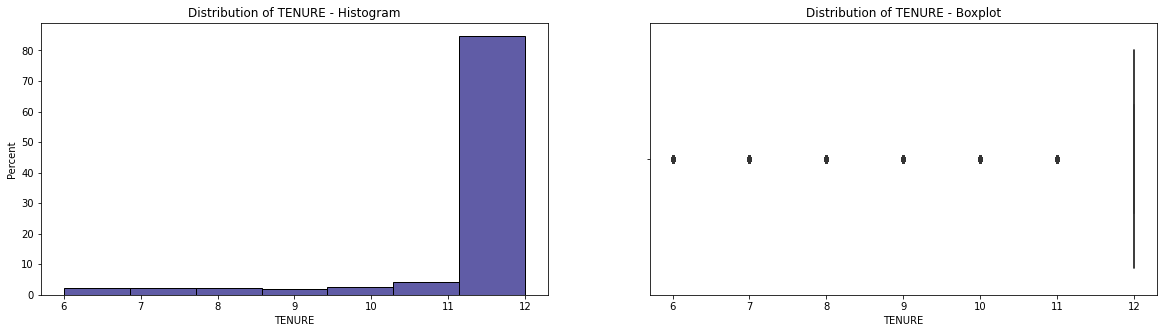

In [314]:
#Print descriptive stats & plot distribution
float_eda('TENURE', bin_count=len(cc['TENURE'].unique()))

**Observations**
* The vast majority of credit card users have a tenure of 12
* Range of tenure is 6 to 12
* Units of measurements for tenure are unclear, usually it would be measured in years

#### Univariate Analysis - BALANCE
* **Definition**: Balance amount left in their account to make purchases

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64




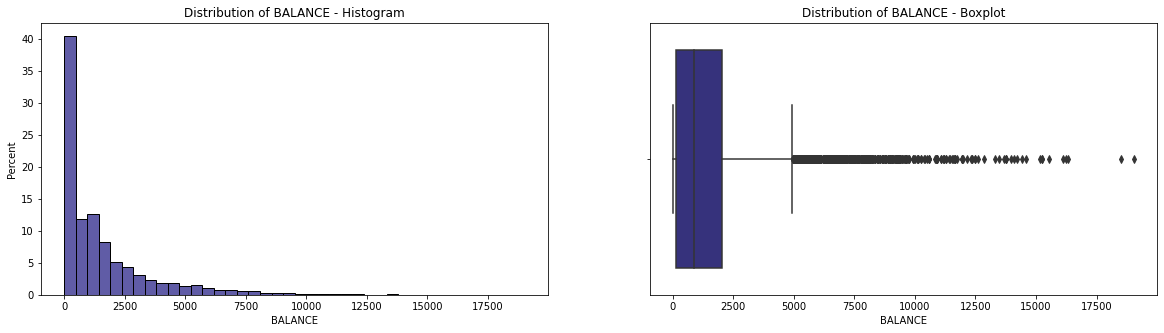

In [315]:
#Print descriptive stats & plot distribution
float_eda('BALANCE', bin_count=40)

**Observations**
* Approximately 40% of credit card users carry a balance under \$500
* There are a lot of credit card users with a balance more than 1.5x the IQR above the mean, with only two credit card users that stand out as outliers with balances beyond \$17,500

#### Univariate Analysis - BALANCE_FREQUENCY
* **Definition**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

count    8950.000000
mean        0.877271
std         0.236904
min         0.000000
25%         0.888889
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64




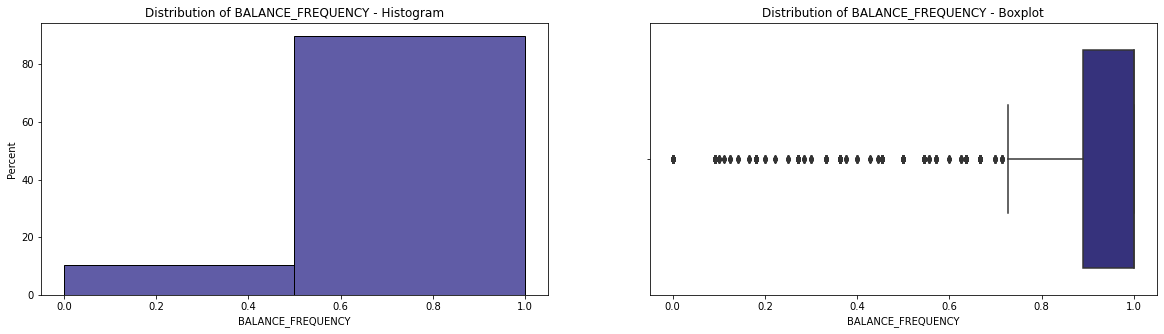

In [316]:
#Print descriptive stats & plot distribution
float_eda('BALANCE_FREQUENCY', bin_count=2)

**Observations**
* Standardized metric between 0 & 1, difficult to interpret as a result.
* The mean of 0.8772 suggests the majority of the credit card users in the dataset pay their balance relatively frequently.
* Only approximately 10% of credit card users have a BALANCE_FREQUENCY below 0.5.

#### Univariate Analysis - PURCHASES
* **Definition**: Amount of purchases made from account.

count     8950.000000
mean      1003.204834
std       2136.634782
min          0.000000
25%         39.635000
50%        361.280000
75%       1110.130000
max      49039.570000
Name: PURCHASES, dtype: float64




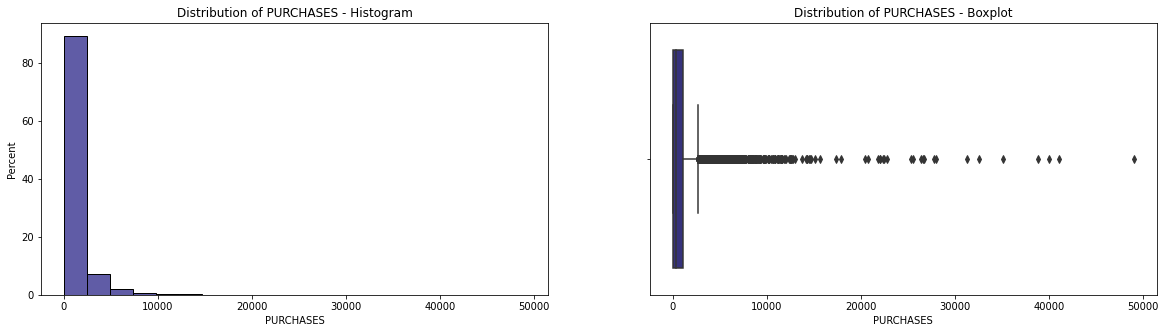

In [317]:
#Print descriptive stats & plot distribution
float_eda('PURCHASES')

**Observations**
* Severely left-skewed distribution, making median a better measure of center. Half of credit card users in this dataset have spent less than \$362 on their credit card in their lifetime as a customer.
* How many credit card users have never made a purchase on their credit card?
* PURCHASES is very dependent on tenure - What is the distribution of annual PURCHASES?

In [318]:
#Print percentage of customers who have never used their credit card
no_purchase_perc = len(cc[cc['PURCHASES']==0])/len(cc)
print(round(no_purchase_prec*100,2),"% of credit card users have never made any purchases.")

22.84 % of credit card users have never made any purchases.


#### Univariate Analysis - PURCHASES_PER_YEAR
* **Definition**: Amount purchases in lifetime of account divided by tenure

In [319]:
#Create PURCHASES_PER_YEAR feature
cc['PURCHASES_PER_YEAR'] = cc['PURCHASES']/cc['TENURE']

In [320]:
#Create a new df for credit card users who have made at least one purchase
cc_active = cc[cc['PURCHASES']>0]

count    6906.000000
mean      111.680828
std       198.443382
min         0.000833
25%        21.272708
50%        52.224167
75%       127.181250
max      4086.630833
Name: PURCHASES_PER_YEAR, dtype: float64




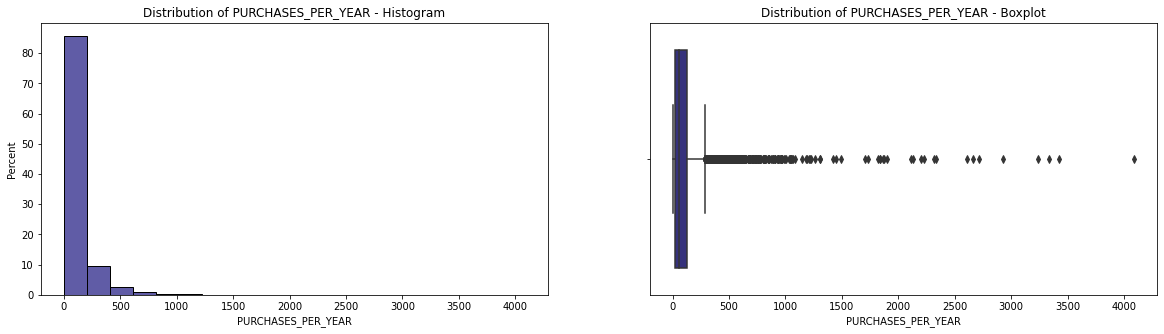

In [321]:
#Print descriptive stats & plot distribution for credit card users who have made at least one purchase
float_eda('PURCHASES_PER_YEAR', df=cc_active)

**Observations**
* Even by removing credit card users who have never made purchases with their credit card & factoring in tenure, PURCHASES is still very lef-skewed. 
* Most credit card users in the dataset spend less than $100 per year, while a handful make several thousand per year. Why?

#### Univariate Analysis - PURCHASES_TRX
* **Definition**: Number of purchase transactions made

count    6906.000000
mean       19.062989
std        26.792240
min         0.000000
25%         5.000000
50%        11.000000
75%        23.000000
max       358.000000
Name: PURCHASES_TRX, dtype: float64




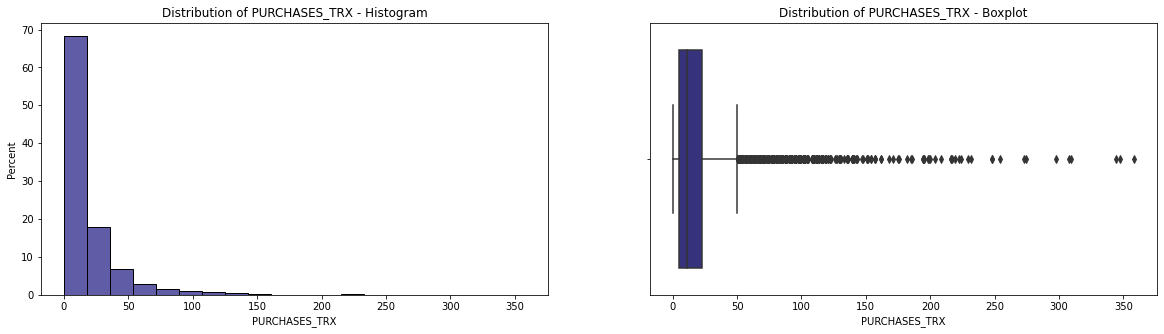

In [322]:
#Print descriptibe stats & plot distribution
float_eda('PURCHASES_TRX',df=cc_active)

**Observations**
* 75% of credit card users have made fewer than 24 transactions in their lifetime as a client. A lot of inactivity!
* In theory, tenure should be closely related to the number of transactions - What is the distribution of purchase count per year?
* Why are there some credit card users who have never made spent more than $0 on their credit card and yet the number of transactions on their account is 0? How many of there are there? 
* What about the inverse problem of credit card customers with transactions but no purchases amount?

In [323]:
#Print number of customers who never spent money of their credit card and yet have a transaction above 0
spent_without_trans = cc[cc.eval('PURCHASES == 0 & PURCHASES_TRX > 0')]
print(len(spent_without_trans),'credit card customers with no spending but a non-zero transaction count')
spent_without_trans

3 credit card customers with no spending but a non-zero transaction count


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_PER_YEAR
4682,C14810,1089.795044,1.000000,0.0,0.0,20.0,38.249993,0.0,0.0,0.166667,0.083333,1,1,1200.0,284.731156,331.103830,0.000000,12,0.0
5727,C15887,1084.649802,1.000000,0.0,0.0,0.0,708.865975,0.0,0.0,0.000000,0.181818,10,1,1500.0,973.731202,252.062796,0.000000,11,0.0
8327,C18548,17.699123,0.454545,0.0,0.0,0.0,29.421611,0.0,0.0,0.000000,0.083333,1,2,2000.0,178.288304,82.738431,0.333333,12,0.0


In [324]:
#Print number of customers who have spent money of their credit card and yet have 0 transactions
trans_without_spend = cc[cc.eval('PURCHASES > 0 & PURCHASES_TRX == 0')]
print(len(trans_without_spend),'credit card customers with spending but no transactions')
trans_without_spend

3 credit card customers with spending but no transactions


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,PURCHASES_PER_YEAR
1458,C11506,4.382924,0.272727,130.24,0.00,152.24,0.0,0.083333,0.000000,0.083333,0.0,0,0,14000.0,28988.973880,1092.184812,0.500000,12,10.853333
3590,C13691,1.869435,0.454545,0.24,0.24,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,0,3000.0,150.381107,53.294711,0.000000,12,0.020000
4497,C14622,72.425884,1.000000,655.68,0.00,655.68,0.0,1.000000,0.000000,1.000000,0.0,0,0,1000.0,718.537117,162.732686,0.333333,12,54.640000


**Univariate Analysis - PURCHASES_TRX_PER_YEAR**
* **Definition**: Number of purchase transactions made divided by tenure

In [325]:
#Create PURCHASES_TRX_PER_YEAR feature
cc_active['PURCHASES_TRX_PER_YEAR'] = cc_active['PURCHASES_TRX']/cc_active['TENURE']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    6906.000000
mean        1.631494
std         2.248550
min         0.000000
25%         0.416667
50%         1.000000
75%         1.979167
max        29.833333
Name: PURCHASES_TRX_PER_YEAR, dtype: float64




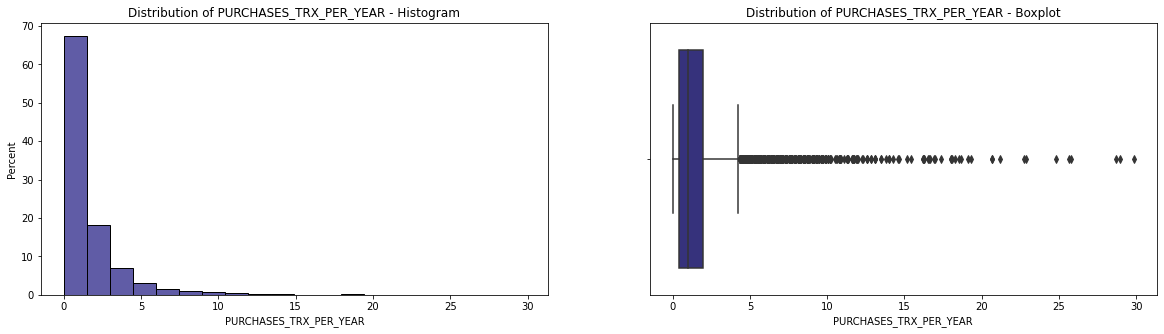

In [326]:
#Print descriptive stats & plot distribution for credit card users who have made at least one purchase
float_eda('PURCHASES_TRX_PER_YEAR', df=cc_active)

**Observations**
* Incredible! Even the most active credit card user makes less than 30 purchases per year on their credit card!
* What is average transaction size among customers who have used their credit card before?


#### UNIVARIATE ANALYSIS - AVG_PURCHASE_SIZE
* **Definition**: Total amount spent on credit card divided by number of purchases

In [327]:
#Create new feature
cc_active['AVG_PURCHASE_SIZE'] = cc_active['PURCHASES']/cc_active['PURCHASES_TRX']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    6906.000000
mean             inf
std              NaN
min         0.010000
25%        33.018834
50%        55.493302
75%        94.613264
max              inf
Name: AVG_PURCHASE_SIZE, dtype: float64




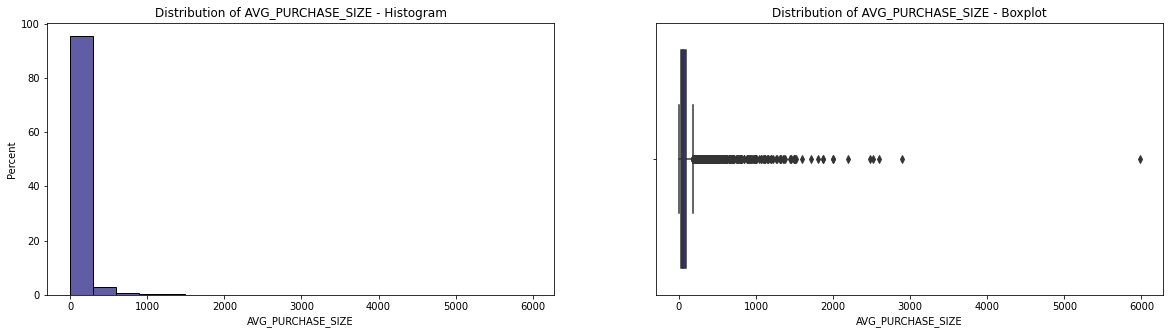

In [328]:
#Print summary stats & plot distribution
float_eda('AVG_PURCHASE_SIZE', df=cc_active)

Here again the distribution is extremely left-skewed... What if we removed the top 5%?

278.6275
count    6560.000000
mean       67.066704
std        50.170131
min         0.010000
25%        32.056111
50%        53.018478
75%        86.096250
max       278.260000
Name: AVG_PURCHASE_SIZE, dtype: float64




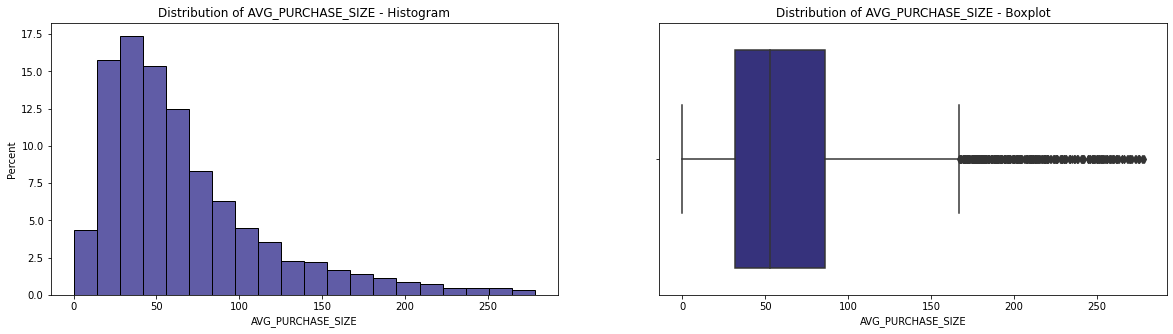

In [331]:
#Print summary stats & plot distribution without the top 5%
print(cc_active['AVG_PURCHASE_SIZE'].quantile(q=0.95))
float_eda('AVG_PURCHASE_SIZE', df=cc_active[cc_active['AVG_PURCHASE_SIZE']<cc_active['AVG_PURCHASE_SIZE'].quantile(q=0.95)])

#### Bivariate Analysis - PURCHASES_PER_YEAR and PURCHASES_TRX_PER_YEAR

Text(0.5, 1.0, 'Relationship between annual purchase amount & annual transaction count')

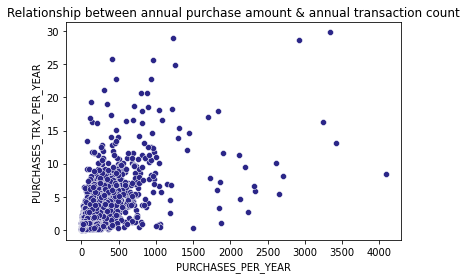

In [332]:
#Plot scatterplot of PURCHASES against PURCHASES_TRX with PURCHASES > 0
sns.scatterplot(x='PURCHASES_PER_YEAR', y='PURCHASES_TRX_PER_YEAR', data=cc_active)
plt.title("Relationship between annual purchase amount & annual transaction count")

**Observations**
* The vast majority of credit card users make a few small purchases every year on average.
* Some credit card users make either spend a lot and make few transactions annually, or vice versa.
* Only 2 or 3 outliers make spend a lot and make many transactions.

In [ ]:
cc.info()

#### Correlation Analysis

Text(0.5, 1.0, 'Correlation Matrix')

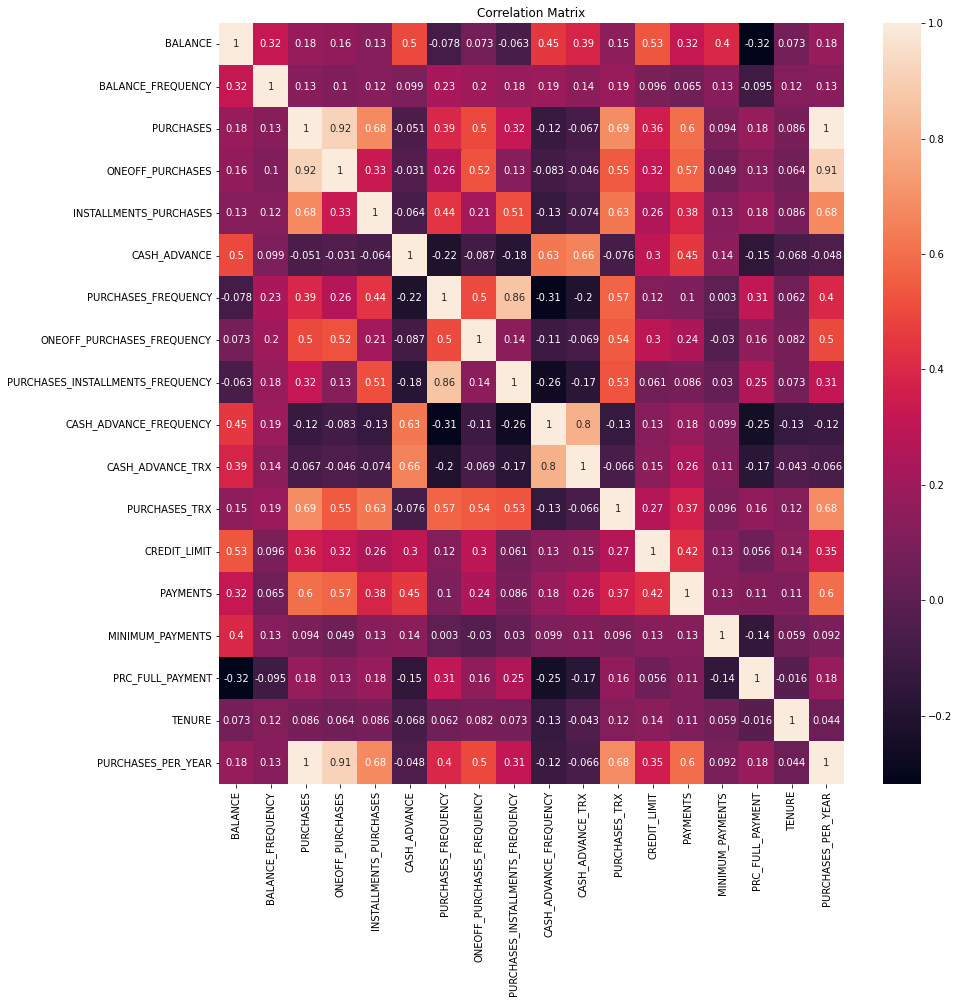

In [333]:
plt.figure(figsize=(14,14))
corr = cc.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')

**Observations**
* PURCHASES appears to have a strong positive correlation with ONEOFF_PURCHASES
* PURCHASES appears to have a weak positive correlation with PURCHASES_TRX and INSTALLMENTS_PURCHASES

# KEY FINDINGS

**Observations**
* Overall, a large number of credit card users in this dataset appear to show no or low activity
* 22.84% of credit card users have never made a purchase on their credit card

**Potential New Features**

**PURCHASES_PER_YEAR**
* PURCHASES divided by TENURE
* Indicates average annual purchase amount

**PURCHASES_TRX_PER_YEAR**
* PURCHASES_TRX divided by TENURE
* Indicates average annual transaction count

**AVG_PURCHASE_SIZE**
* PURCHASES divided by PURCHASES_TRX
* Indicates average transaction size
* CAUTION - This lead to errors due to division by zero, will need to manage this...

**Discrepencies**
* Why do 3 users show a non-zero amount spent on their credit card but a transaction count of zero?
* Why do 3 users show that they have spent on their credit card but have a non-zero transaction count?

**Questions**
* Is tenure measured in years?